<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/CVLC_05_No_Data_Argmentation(public_0_81862_private_0_76593).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import tensorflow as tf

In [3]:
train = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/submission.csv')

In [4]:
# drop columns
x_train = train.drop(['id','digit','letter'],1)
x_train = x_train.values

In [5]:
# reshape
x_train = x_train.reshape(-1,28,28,1)

In [6]:
# 정규화
x_train = x_train/255

In [7]:
# one hot encoder
def one_hot_encoder(x):
    y = np.zeros((len(x), len(np.unique(x))))  # 모든 값이 0인 백터
    for i, num in enumerate(x):
        y[i][num] = 1  # Label에 해당하는 인덱스에 1을 입력
    return y

In [8]:
y_train = one_hot_encoder(train['digit'])

In [9]:
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:])

    bn = tf.keras.layers.BatchNormalization(trainable=False)(inputs)
    conv = tf.keras.layers.Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
    
    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(512, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv) 
    conv = tf.keras.layers.Conv2D(512, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv) 

    flatten = tf.keras.layers.Flatten()(pool)

    bn = tf.keras.layers.BatchNormalization()(flatten)
    dense = tf.keras.layers.Dense(1000, activation='relu')(bn)

    bn = tf.keras.layers.BatchNormalization()(dense)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(bn)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    return model

In [10]:
# 모델만들기
model = create_cnn_model(x_train)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       65664     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 128)       512   

In [12]:
model.fit(x_train, y_train, epochs=14)

Epoch 1/14
64/64 [==============================] - 53s 802ms/step - loss: 2.5155 - accuracy: 0.3838
Epoch 2/14
64/64 [==============================] - 52s 806ms/step - loss: 1.1378 - accuracy: 0.6362
Epoch 3/14
64/64 [==============================] - 52s 805ms/step - loss: 0.7396 - accuracy: 0.7549
Epoch 4/14
64/64 [==============================] - 51s 800ms/step - loss: 0.4703 - accuracy: 0.8384
Epoch 5/14
64/64 [==============================] - 51s 796ms/step - loss: 0.3329 - accuracy: 0.8789
Epoch 6/14
64/64 [==============================] - 51s 791ms/step - loss: 0.2634 - accuracy: 0.9038
Epoch 7/14
64/64 [==============================] - 51s 793ms/step - loss: 0.1745 - accuracy: 0.9414
Epoch 8/14
64/64 [==============================] - 51s 796ms/step - loss: 0.1505 - accuracy: 0.9429
Epoch 9/14
64/64 [==============================] - 51s 792ms/step - loss: 0.1634 - accuracy: 0.9385
Epoch 10/14
64/64 [==============================] - 51s 791ms/step - loss: 0.1314 - accura

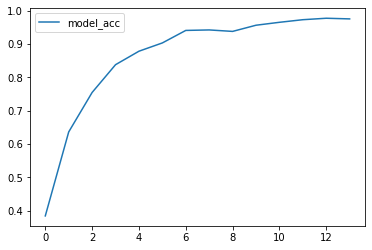

In [13]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"], label='model_acc')
plt.legend()
plt.show()

In [14]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

In [15]:
# 적용
sub['digit'] = np.argmax(model.predict(x_test), axis=1)
sub.head()

,id,digit
0,2049,6
1,2050,9
2,2051,6
3,2052,0
4,2053,3


In [17]:
# 파일저장
sub.to_csv('baseline.csv', index=False)